# Wine Quality Prediction Using Random Forest (Classification)

We have a wine quality Dataset. There are 11 independent features and 1 output feature. Our aim is to train our model with training data and based on the input feature we have to predict either wine quality is good or bad.

Workflow:

1.Data collection
2.Data Analysis and Data Vizualization
3.Model building
4.Making a predictive system

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\KESHAB CHANDRA DAS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Data Collection

In [2]:
df=pd.read_csv("winequality.csv")

In [3]:
#Checking number of rows and columns
df.shape

(1599, 12)

In [4]:
#printinting first 5 records
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking Missing Values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So,we can see there is no missing values in the dataset

# Data analysis and Vizualisation

Statistical Overview of the dataset

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


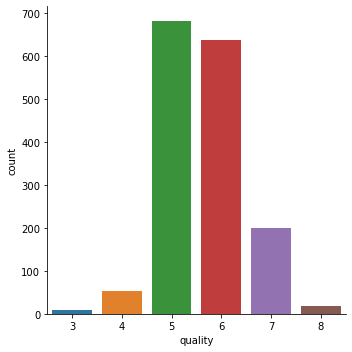

In [7]:
#number of values for each quality
sns.catplot(x='quality',data=df,kind='count')

3 is the lowest wine quality and 8 is the highest quality.And we can see most number of wine falls under quality 5 & 6

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

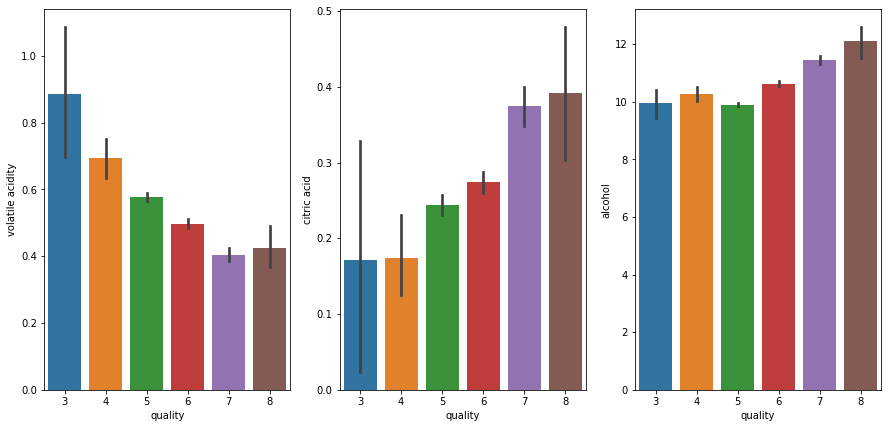

In [8]:
#checking relationship of random features with respect to "quality"

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.barplot(x='quality',y='volatile acidity',data=df)

plt.subplot(1,3,2)
sns.barplot(x='quality',y='citric acid',data=df)

plt.subplot(1,3,3)
sns.barplot(x='quality',y='alcohol',data=df)

We can see that quality is inversely proportional to volatile acidity.and directly proportional to citric acid and alcohol.

# Correlation Matrix

In [9]:
correlation=df.corr()

<AxesSubplot:>

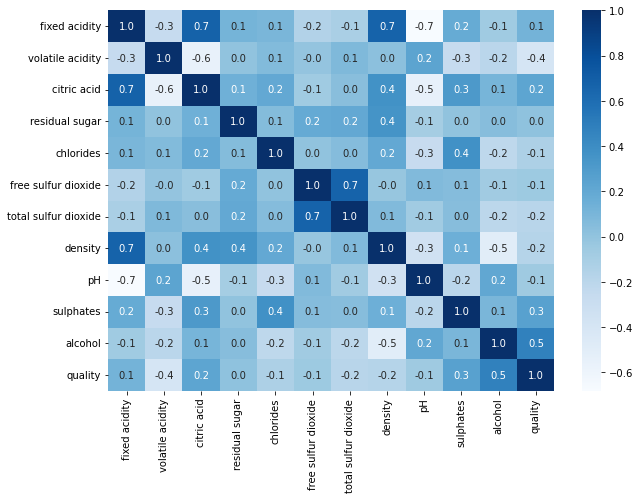

In [10]:
# creating heatmap to understand the correlation between the columns
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, cmap='Blues')

# Data Processing

In [12]:
#separate the data and the label
X=df.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

As we are doing a binary classification we need to segregate all the qualities into two classes. upto quality 6,it is bad.And good quality for 7,8.

In [13]:
Y=df['quality'].apply(lambda y_value: 1 if y_value>6 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [15]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

train-test split

In [17]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

In [18]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


# Model Building

Random Forest Classifier

In [19]:
#initialize Random Forest Classifier
model= RandomForestClassifier()

In [20]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

In [21]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.925


# Building a Predictive System

In [24]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


C:\Users\KESHAB CHANDRA DAS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
